# Example

Excerpts from supereeg tutorial using Kai Miller's data faces_basic

In [1]:
import supereeg as se
import os
import numpy as np
from scipy.io import loadmat
%matplotlib inline

## Load data from .mat files

This tutorial uses the faces_basic library without modifying the file structure. Modify this cell to match your file structure:

In [2]:
data_dir = '../miller_data/faces_basic/data/'
data_name = 'faceshouses.mat'
locs_dir = '../miller_data/faces_basic/locs/'
locs_name = 'xslocs.mat'

First we read the patient ids from the file structure. This is necessary to ensure we use matching data when constructing the brain objects.

In [3]:
ids = [x for x in os.listdir(data_dir) if x[0] != '.']
ids[0]

'jt'

Next we use scipy.io.loadmat to read the .mat files as dictionaries. 

In [5]:
data = {f'{x}': loadmat(f"{data_dir}{x}/{x}_{data_name}") for x in ids}
type(data['jt'])

dict

Since the only data we need from the xslocs.mat files are the electrode locations ('locs'), we append these data to our existing data dictionaries.

In [6]:
for x in ids:
    data[x]['locs'] = loadmat(f"{locs_dir}{x}_{locs_name}")['locs']

In [7]:
data['jt'].keys()

dict_keys(['__header__', '__version__', '__globals__', 'data', 'stim', 'srate', 'locs'])

We assume that the data and the locations share the same indices even though we can't be sure just from looking at the data.

## Building a brain object

Brain objects are supereeg’s fundamental data structure for a single subject’s ECoG data. To create one at minimum you’ll need a matrix of neural recordings (time samples by electrodes), electrode locations, and a sample rate. Additionally, you can include information about separate recording sessions and store custom meta data.

To construct a new brain object, simply pass the data and locations to the Brain class like this:

In [8]:
bos = {f'{x}': 
       se.Brain(data = data[x]['data'], locs = data[x]['locs'], 
                sample_rate = data[x]['srate'])
       for x in ids}

To view a summary of the contents of the brain object, you can call the info function:

In [9]:
bos['jt'].info()

Number of electrodes: 102
Recording time in seconds: [[271.4]]
Sample Rate in Hz: [array([1000], dtype=uint16)]
Number of sessions: 1
Date created: Fri Jan 24 14:01:20 2025
Meta data: {}


You can plot both the data and the electrode locations:

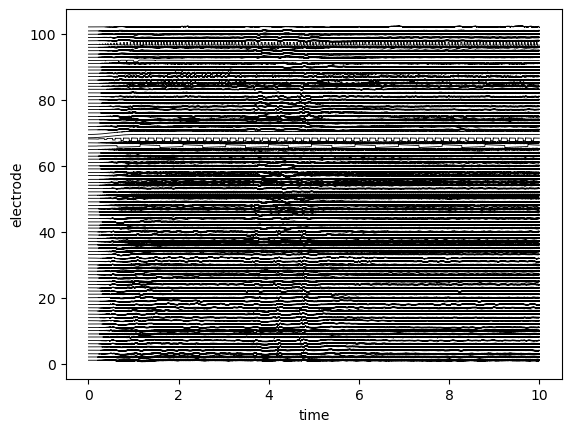

In [10]:
bos['jt'].plot_data()

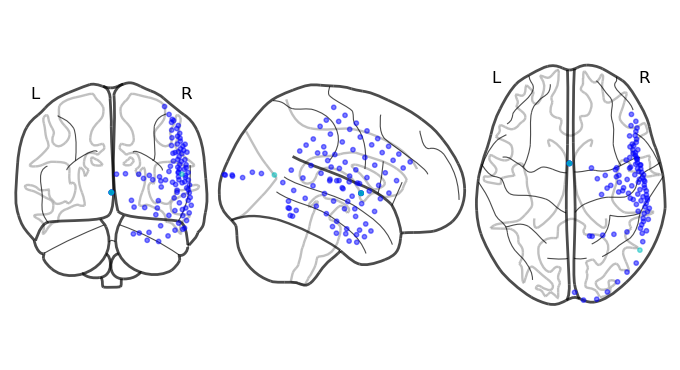

In [11]:
bos['jt'].plot_locs()

For more features and documentation please refer to the supereeg API and/or the tutorials.